In [1]:
!pip install numpy pandas matplotlib scikit-learn scipy


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [3]:
def lotka_volterra(state, t, alpha, beta, delta, gamma):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]


In [4]:
param_bounds = {
    "alpha": (0.5, 1.5),   # prey growth rate
    "beta": (0.02, 0.1),   # predation rate
    "delta": (0.01, 0.1),  # predator reproduction
    "gamma": (0.5, 1.5)    # predator death rate
}


In [5]:
time = np.linspace(0, 20, 200)
data = []

for _ in range(1000):
    alpha = np.random.uniform(*param_bounds["alpha"])
    beta = np.random.uniform(*param_bounds["beta"])
    delta = np.random.uniform(*param_bounds["delta"])
    gamma = np.random.uniform(*param_bounds["gamma"])

    initial_state = [10, 5]
    solution = odeint(lotka_volterra, initial_state, time,
                      args=(alpha, beta, delta, gamma))

    prey_final, predator_final = solution[-1]

    data.append([alpha, beta, delta, gamma, prey_final, predator_final])

df = pd.DataFrame(data, columns=[
    "alpha", "beta", "delta", "gamma", "prey_final", "predator_final"
])

df.head()


,alpha,beta,delta,gamma,prey_final,predator_final
0,1.322856,0.061376,0.060158,1.320706,5.119697,40.422890
1,0.742255,0.063888,0.060545,0.942082,18.260579,24.528612
2,0.766678,0.033105,0.095072,1.283080,5.438521,9.599658
3,0.515988,0.082954,0.025706,0.671855,20.307906,13.905696
4,1.215850,0.070340,0.031513,1.399037,113.755017,4.309846


In [6]:
X = df[["alpha", "beta", "delta", "gamma"]]
y = df["prey_final"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, mse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "R2 Score"])
results_df


,Model,MSE,R2 Score
0,Linear Regression,1964.655221,0.165224
1,Ridge Regression,2168.666872,0.078540
2,Decision Tree,3416.979368,-0.451865
3,Random Forest,1689.272126,0.282233
4,Gradient Boosting,2041.460556,0.132589


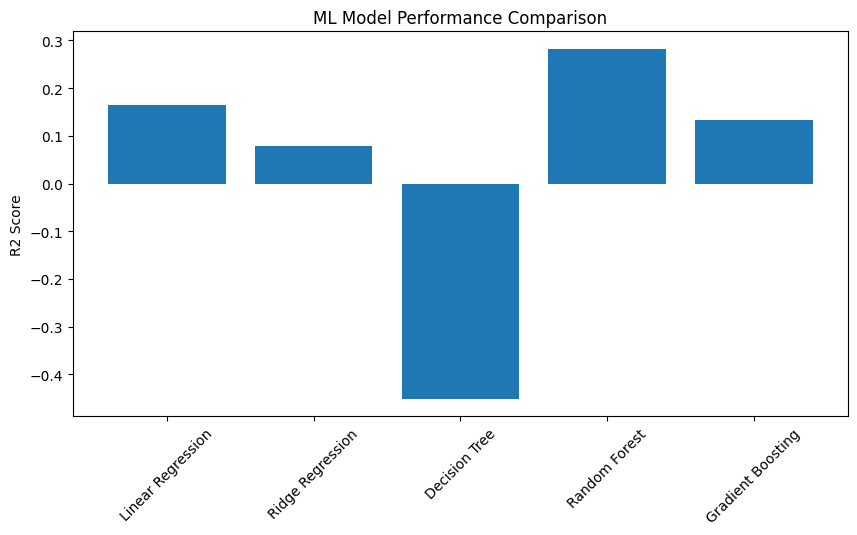

In [8]:
plt.figure(figsize=(10,5))
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.ylabel("R2 Score")
plt.title("ML Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()


In [9]:
df.to_csv("simulation_data.csv", index=False)
